In [399]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder


In [260]:
bank = pd.read_csv("Bank_of_America_data.csv")

In [261]:
bank.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [262]:
bank.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

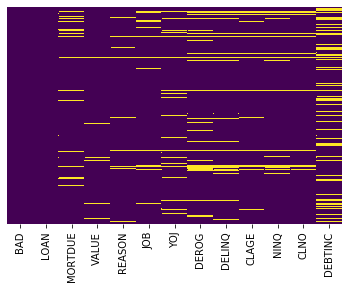

In [263]:
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [264]:
baseL = bank.dropna()

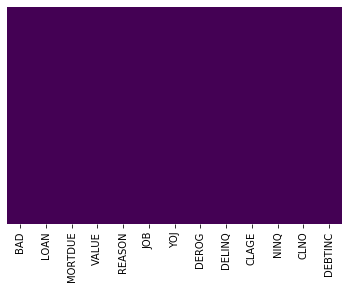

In [265]:
sns.heatmap(baseL.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [266]:
baseL["REASON"].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [267]:
encoder2=LabelEncoder()

In [268]:
encoder2.fit(baseL["REASON"].values)

LabelEncoder()

In [269]:
matriceReason=encoder2.transform(baseL["REASON"].values)

In [270]:
df2=pd.DataFrame(matriceReason,index=baseL.index,columns=["REASON"])

In [271]:
baseLP = baseL.drop(columns=["JOB","REASON"])

In [272]:
oneHotEncoder=OneHotEncoder()

In [273]:
matriceJob=oneHotEncoder.fit_transform(baseL["JOB"].values.reshape(-1,1))

In [274]:
matriceJob.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [275]:
matriceJob=matriceJob.toarray()

In [276]:
df1=pd.DataFrame(matriceJob,columns=["Other","Office","Mgr","ProfExe","Sales","Self"],index=baseL.index)

In [277]:
df1.head()

,Other,Office,Mgr,ProfExe,Sales,Self
5,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0,0.0,0.0
25,1.0,0.0,0.0,0.0,0.0,0.0
26,0.0,1.0,0.0,0.0,0.0,0.0


In [278]:
df1.drop(columns=["Mgr"],inplace=True)

In [279]:
baseLP=pd.concat([df1,df2,baseLP],axis=1)

In [280]:
baseLP.head()

,Other,Office,ProfExe,Sales,Self,REASON,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,0.0,0.0,0.0,0.0,0.0,1,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,0.0,0.0,0.0,0.0,0.0,1,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0.0,1.0,0.0,0.0,0.0,1,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1.0,0.0,0.0,0.0,0.0,1,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0.0,1.0,0.0,0.0,0.0,1,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [281]:
X1 = baseLP.iloc[:,0:6]

In [282]:
X2 = baseLP.iloc[:,7:17]

In [283]:
X_bad = pd.concat([X1,X2],axis=1)

In [284]:
X_bad.head()

,Other,Office,ProfExe,Sales,Self,REASON,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,0.0,0.0,0.0,0.0,0.0,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,0.0,0.0,0.0,0.0,0.0,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0.0,1.0,0.0,0.0,0.0,1,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1.0,0.0,0.0,0.0,0.0,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0.0,1.0,0.0,0.0,0.0,1,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


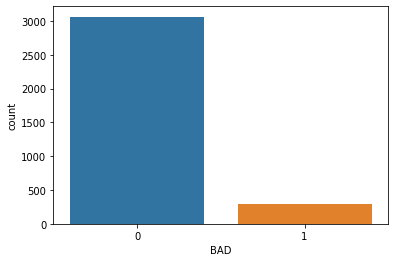

In [285]:
sns.countplot(baseL['BAD'],label="Count")
plt.show()

In [286]:
Y_job= pd.factorize(baseL["JOB"])[0]

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X_job, Y_job, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Text(0, 0.5, 'Erreur')

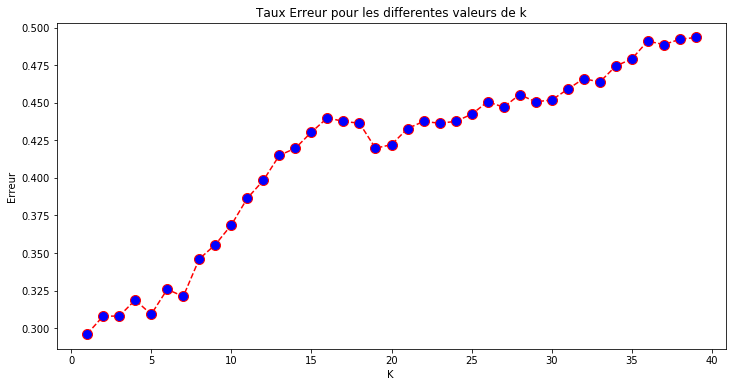

In [288]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [289]:
knn = KNeighborsClassifier(2,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [290]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.73


In [291]:
print(confusion_matrix(y_test, y_pred_knn))

[[298  10   8   7   1   0]
 [ 43  97   4   8   0   0]
 [ 35  14  60   5   0   0]
 [ 38  25   9 145   1   0]
 [  7   0   1   1   4   0]
 [  5   2   0   0   0  13]]


In [292]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       324
           1       0.66      0.64      0.65       152
           2       0.73      0.53      0.61       114
           3       0.87      0.67      0.76       218
           4       0.67      0.31      0.42        13
           5       1.00      0.65      0.79        20

    accuracy                           0.73       841
   macro avg       0.77      0.62      0.67       841
weighted avg       0.75      0.73      0.73       841



In [293]:
# CART
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of CART classifier on training set: 0.97
Accuracy of CART classifier on test set: 0.73


In [294]:
print(confusion_matrix(y_test, y_pred_dtc))

[[224  25  35  36   4   0]
 [ 88  33  14  13   4   0]
 [ 58  14  27  12   3   0]
 [114  28  18  58   0   0]
 [  5   1   1   3   3   0]
 [ 12   3   0   5   0   0]]


In [295]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.45      0.69      0.54       324
           1       0.32      0.22      0.26       152
           2       0.28      0.24      0.26       114
           3       0.46      0.27      0.34       218
           4       0.21      0.23      0.22        13
           5       0.00      0.00      0.00        20

    accuracy                           0.41       841
   macro avg       0.29      0.27      0.27       841
weighted avg       0.39      0.41      0.38       841



/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [296]:
# Random Forest
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [297]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.97
Accuracy of Random Forest classifier on test set: 0.73


In [298]:
print(confusion_matrix(y_test, y_pred_rfc))

[[279  17  11  17   0   0]
 [ 91  36  17   8   0   0]
 [ 55   4  41  14   0   0]
 [106  11  14  87   0   0]
 [  6   1   2   3   1   0]
 [  8   1   1   4   0   6]]


In [299]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.51      0.86      0.64       324
           1       0.51      0.24      0.32       152
           2       0.48      0.36      0.41       114
           3       0.65      0.40      0.50       218
           4       1.00      0.08      0.14        13
           5       1.00      0.30      0.46        20

    accuracy                           0.54       841
   macro avg       0.69      0.37      0.41       841
weighted avg       0.56      0.54      0.50       841



In [348]:
bank.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [355]:
bankQuanti = pd.concat([bank.iloc[:,0:4], bank.iloc[:,6:13]],axis=1)

In [356]:
bankQuanti.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [357]:
bankQuali = bank.iloc[:,4:6]

In [359]:
bankQuali.head()

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,NaN,NaN
4,HomeImp,Office


In [360]:
bankQuanti.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [364]:
bankQuanti = bankQuanti.fillna(bankQuanti.median());

In [365]:
bankQuanti.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

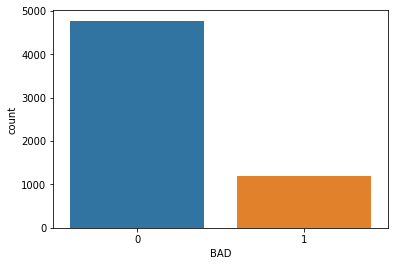

In [300]:
sns.countplot(bank['BAD'],label="Count")
plt.show()

In [366]:
bankQuali = bankQuali.fillna("other++")

In [367]:
bankQuali.shape

(5960, 2)

In [368]:
bankQuali.isna().sum()

REASON    0
JOB       0
dtype: int64

In [369]:
bankQuali["REASON"].unique()

array(['HomeImp', 'other++', 'DebtCon'], dtype=object)

In [370]:
bankQuali["JOB"].unique()

array(['Other', 'other++', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [373]:
oneHotEncoder=OneHotEncoder()
matrice=oneHotEncoder.fit_transform(bankQuali["REASON"].values.reshape(-1,1))
matrice.toarray()
matrice=matrice.toarray()
df1=pd.DataFrame(matrice
                 ,columns=["HomeImp","other++","DebtCon"]
                 ,index=bank.index)
df1 = df1.drop(columns=["other++"])
df2 = bankQuali.drop(columns=["REASON"])



oneHotEncoder2=OneHotEncoder()
matrice2=oneHotEncoder2.fit_transform(bankFilOther["JOB"].values.reshape(-1,1))
matrice2.toarray()
matrice2=matrice2.toarray()
df11=pd.DataFrame(matrice2,columns=["Other","other++","Office","Sales","Mgr","ProfExe","Self"],index=bankFilOther.index)
df11 = df11.drop(columns=["other++"])
df2 = df2.drop(columns=["JOB"])

BankOtherMedian=pd.concat([df1,df11,bankQuanti],axis=1)

In [375]:
BankOtherMedian.head()

,HomeImp,DebtCon,Other,Office,Sales,Mgr,ProfExe,Self,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [377]:
x1_bad = BankOtherMedian.iloc[:,0:8]
x2_bad = BankOtherMedian.iloc[:,9:22]
X_bad = pd.concat([x1_bad,x2_bad],axis=1)

In [378]:
Y_bad= pd.factorize(BankOtherMedian["BAD"])[0]

In [379]:
BankOtherMedian.columns

Index(['HomeImp', 'DebtCon', 'Other', 'Office', 'Sales', 'Mgr', 'ProfExe',
       'Self', 'BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [409]:
X_bad.head()

,HomeImp,DebtCon,Other,Office,Sales,Mgr,ProfExe,Self,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [411]:
X_bad.columns

Index(['HomeImp', 'DebtCon', 'Other', 'Office', 'Sales', 'Mgr', 'ProfExe',
       'Self', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

Text(0, 0.5, 'Erreur')

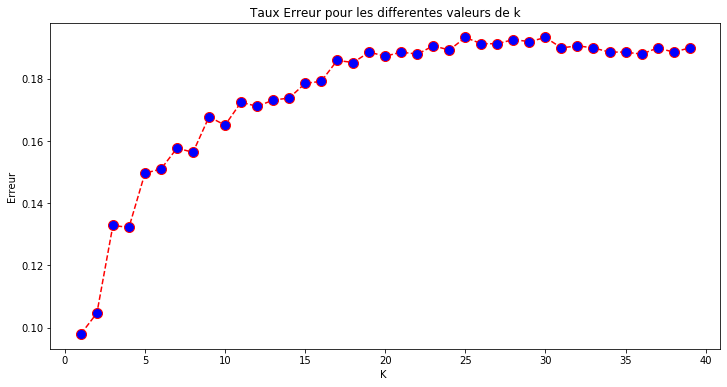

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X_bad, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')


In [383]:
knn = KNeighborsClassifier(2,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.92


In [384]:
print(confusion_matrix(y_test, y_pred_knn))

[[ 212   84]
 [  39 1155]]


In [385]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78       296
           1       0.93      0.97      0.95      1194

    accuracy                           0.92      1490
   macro avg       0.89      0.84      0.86      1490
weighted avg       0.91      0.92      0.91      1490



In [400]:
#saving model 
pickle.dump(knn , open('model.pkl','wb'))

In [408]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


In [413]:
BankOtherMedian.tail()

,HomeImp,DebtCon,Other,Office,Sales,Mgr,ProfExe,Self,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,89900,48811.0,88934.0,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [394]:
# CART
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.78


In [388]:
print(confusion_matrix(y_test, y_pred_dtc))

[[  87  209]
 [ 129 1065]]


In [392]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.40      0.29      0.34       296
           1       0.84      0.89      0.86      1194

    accuracy                           0.77      1490
   macro avg       0.62      0.59      0.60      1490
weighted avg       0.75      0.77      0.76      1490



In [395]:
# Random Forest
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.85


In [396]:
print(confusion_matrix(y_test, y_pred_rfc))

[[ 108  188]
 [  34 1160]]


In [397]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.76      0.36      0.49       296
           1       0.86      0.97      0.91      1194

    accuracy                           0.85      1490
   macro avg       0.81      0.67      0.70      1490
weighted avg       0.84      0.85      0.83      1490

